Title :"BellaBeat Fitness Tracker Analysis"

Author:"Elango T"

Date  :"07/14/2021"

# <center>BELLA BEAT CASE STUDY</center>

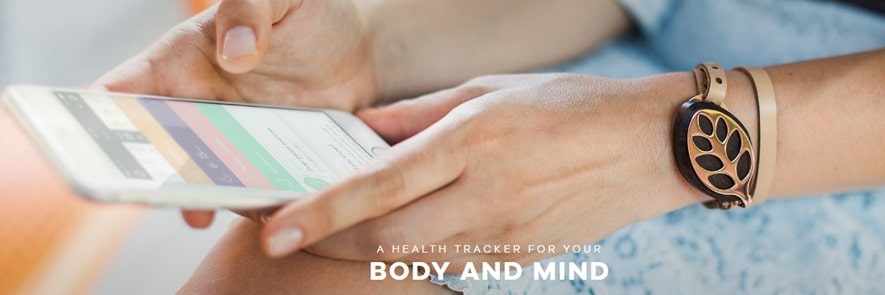

**About Bellabeat**

Bellabeat is a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market.Collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with knowledge about their own health and habits. Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women.

**Key Stakeholders**
* Urška Sršen: Cofounder and Chief Creative Officer
* Sando Mur: Cofounder and Mathematician

# Business Task
* Analyze smart device usage data in order to gain insight into how consumers use non-Bellabeat smart devices.

* Identify trends and apply these insights to one of the Bellabeat product which help influence its marketing strategy.

# Preparing data for analysis
* The dataset used for this analysis is: FitBit Fitness Tracker Data(https://www.kaggle.com/arashnic/fitbit)

* License: CC0: Public Domain, dataset made available through Möbius

* Data used is in long format for this case study.

* This Kaggle dataset contains personal fitness tracker from thirty fitbit users. Thirty eligible Fitbit users consented     to the submission of personal tracker data, including minute-level output for physical activity,heart rate,and sleep       monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’         habits.
* The data is from 2016,reliability is low.




# Processing data
* R tool is used for data processing and analysis.

**Install and load necessary packages in R for analysis**


In [1]:
install.packages("tidyverse")
library(tidyverse)
install.packages("ggplot2")
library(ggplot2)
install.packages("lubridate")
library(lubridate)
install.packages("dplyr")
library(plyr)
install.packages("readr")
library(readr)
library(tidyr)
install.packages("skimr")
library(skimr)
library(data.table)
install.packages("sqldf")
library(sqldf)
install.packages("magrittr")
library(magrittr)
install.packages("janitor")
library(janitor)
install.packages("plyr")
library(plyr)
install.packages("calendR")
install.packages("grid")
library(grid)
install.packages("gridExtra")
library(gridExtra)
install.packages("corrplot")
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”
Warning message:
“package ‘tidyverse’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.4     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to acces

**Load csv files**

uploading datasets


In [2]:
daily_activity <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
dailycalories <-  read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
dailyintensities <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
dailysteps <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
hourlycalories <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
hourlyintensities <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
hourlysteps <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
minutecalories <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv")
minuteintensities <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesNarrow_merged.csv")
minutesleep <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv")
minutesteps <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteStepsNarrow_merged.csv")
dailysleep <-  read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
dailyweight <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
minutesmet <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv")



**Inspecting the datasets**

  inspecting daily data first - dailyactivities,dailycalories,dailyintensities,dailysteps,dailysleep,dailyweight

In [3]:
skim_without_charts(daily_activity)
skim_without_charts(dailycalories)
skim_without_charts(dailysteps)
skim_without_charts(dailyintensities)
skim_without_charts(dailysleep)
skim_without_charts(dailyweight)
str(daily_activity)
str(dailycalories)
str(dailysteps)
str(dailyintensities)
str(dailysleep)
str(dailyweight)
head(daily_activity)
head(dailycalories)
head(dailysteps)
head(dailyintensities)
head(dailysleep)
head(dailyweight)


── Data Summary ────────────────────────
                           Values        
Name                       daily_activity
Number of rows             940           
Number of columns          15            
_______________________                  
Column type frequency:                   
  character                1             
  numeric                  14            
________________________                 
Group variables            None          

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
1 ActivityDate          0             1     8     9     0       31          0

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable            n_missing complete_rate    mean      sd         p0
 1 Id                               0             1 4.86e+9 2.42e+9 1503960366
 2 TotalSteps                       0             1 7.64e+3 5

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,Id,ActivityDay,Calories
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016,1985
2,1503960366,4/13/2016,1797
3,1503960366,4/14/2016,1776
4,1503960366,4/15/2016,1745
5,1503960366,4/16/2016,1863
6,1503960366,4/17/2016,1728


,Id,ActivityDay,StepTotal
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016,13162
2,1503960366,4/13/2016,10735
3,1503960366,4/14/2016,10460
4,1503960366,4/15/2016,9762
5,1503960366,4/16/2016,12669
6,1503960366,4/17/2016,9705


,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
,<dbl>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,4/12/2016,728,328,13,25,0,6.06,0.55,1.88
2,1503960366,4/13/2016,776,217,19,21,0,4.71,0.69,1.57
3,1503960366,4/14/2016,1218,181,11,30,0,3.91,0.40,2.44
4,1503960366,4/15/2016,726,209,34,29,0,2.83,1.26,2.14
5,1503960366,4/16/2016,773,221,10,36,0,5.04,0.41,2.71
6,1503960366,4/17/2016,539,164,20,38,0,2.51,0.78,3.19


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12
2,1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,True,1.462320e+12
3,1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,False,1.460510e+12
4,2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,True,1.461283e+12
5,2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,True,1.463098e+12
6,4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,True,1.460938e+12


**Result of daily data inspection:**
*  daily_activity contains data of dailycalories,dailyintensities and dailysteps.
*  Further investigation is to be made on unique ids for the use of only daily_activity data in analysis.
*  dailysleep and dailyweight have sleepdata and weightdata of unique ids.
*  date formats is in character which should be changed.
*  TotalDistance and TrackerDistance have same data which is the total of four columns- "SedentaryActiveDistance", "LightActiveDistance", "ModeratelyActiveDistance", "VeryActiveDistance".


Inspecting hourly data - hourlycalories,hourlyintensities,hourlysteps

In [4]:
skim_without_charts(hourlycalories)
skim_without_charts(hourlyintensities)
skim_without_charts(hourlysteps)

str(hourlycalories)
str(hourlysteps)
str(hourlyintensities)

head(hourlycalories)
head(hourlysteps)
head(hourlyintensities)

── Data Summary ────────────────────────
                           Values        
Name                       hourlycalories
Number of rows             22099         
Number of columns          3             
_______________________                  
Column type frequency:                   
  character                1             
  numeric                  2             
________________________                 
Group variables            None          

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
1 ActivityHour          0             1    19    21     0      736          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate         mean           sd         p0
1 Id                    0             1 4848235270.  2422500401.  1503960366
2 Calories              0             1         97.4         60.7

,Id,ActivityHour,Calories
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,81
2,1503960366,4/12/2016 1:00:00 AM,61
3,1503960366,4/12/2016 2:00:00 AM,59
4,1503960366,4/12/2016 3:00:00 AM,47
5,1503960366,4/12/2016 4:00:00 AM,48
6,1503960366,4/12/2016 5:00:00 AM,48


,Id,ActivityHour,StepTotal
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,373
2,1503960366,4/12/2016 1:00:00 AM,160
3,1503960366,4/12/2016 2:00:00 AM,151
4,1503960366,4/12/2016 3:00:00 AM,0
5,1503960366,4/12/2016 4:00:00 AM,0
6,1503960366,4/12/2016 5:00:00 AM,0


,Id,ActivityHour,TotalIntensity,AverageIntensity
,<dbl>,<chr>,<int>,<dbl>
1,1503960366,4/12/2016 12:00:00 AM,20,0.333333
2,1503960366,4/12/2016 1:00:00 AM,8,0.133333
3,1503960366,4/12/2016 2:00:00 AM,7,0.116667
4,1503960366,4/12/2016 3:00:00 AM,0,0.000000
5,1503960366,4/12/2016 4:00:00 AM,0,0.000000
6,1503960366,4/12/2016 5:00:00 AM,0,0.000000


**Result of hour data inspection:**
* All the three dataset have same number of rows in each data frame.
* date,time is in character type and should be changed.

Inspecting minute datasets- minutecalories,minuteintensities,minutesteps,minutesmet.

In [5]:
skim_without_charts(minutecalories)
skim_without_charts(minuteintensities)
skim_without_charts(minutesteps)
skim_without_charts(minutesleep)
skim_without_charts(minutesmet)

str(minutecalories)
str(minutesteps)
str(minuteintensities)
str(minutesleep)
str(minutesmet)

head(minutecalories)
head(minutesteps)
head(minuteintensities)
head(minutesleep)
head(minutesmet)

── Data Summary ────────────────────────
                           Values        
Name                       minutecalories
Number of rows             1325580       
Number of columns          3             
_______________________                  
Column type frequency:                   
  character                1             
  numeric                  2             
________________________                 
Group variables            None          

── Variable type: character ────────────────────────────────────────────────────
  skim_variable  n_missing complete_rate   min   max empty n_unique whitespace
1 ActivityMinute         0             1    19    21     0    44160          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate          mean            sd         p0
1 Id                    0             1 4847897692.   2422313222.   1503960366
2 Calories              0             1          1.62      

,Id,ActivityMinute,Calories
,<dbl>,<chr>,<dbl>
1,1503960366,4/12/2016 12:00:00 AM,0.7865
2,1503960366,4/12/2016 12:01:00 AM,0.7865
3,1503960366,4/12/2016 12:02:00 AM,0.7865
4,1503960366,4/12/2016 12:03:00 AM,0.7865
5,1503960366,4/12/2016 12:04:00 AM,0.7865
6,1503960366,4/12/2016 12:05:00 AM,0.9438


,Id,ActivityMinute,Steps
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,0
2,1503960366,4/12/2016 12:01:00 AM,0
3,1503960366,4/12/2016 12:02:00 AM,0
4,1503960366,4/12/2016 12:03:00 AM,0
5,1503960366,4/12/2016 12:04:00 AM,0
6,1503960366,4/12/2016 12:05:00 AM,0


,Id,ActivityMinute,Intensity
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,0
2,1503960366,4/12/2016 12:01:00 AM,0
3,1503960366,4/12/2016 12:02:00 AM,0
4,1503960366,4/12/2016 12:03:00 AM,0
5,1503960366,4/12/2016 12:04:00 AM,0
6,1503960366,4/12/2016 12:05:00 AM,0


,Id,date,value,logId
,<dbl>,<chr>,<int>,<dbl>
1,1503960366,4/12/2016 2:47:30 AM,3,11380564589
2,1503960366,4/12/2016 2:48:30 AM,2,11380564589
3,1503960366,4/12/2016 2:49:30 AM,1,11380564589
4,1503960366,4/12/2016 2:50:30 AM,1,11380564589
5,1503960366,4/12/2016 2:51:30 AM,1,11380564589
6,1503960366,4/12/2016 2:52:30 AM,1,11380564589


,Id,ActivityMinute,METs
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,10
2,1503960366,4/12/2016 12:01:00 AM,10
3,1503960366,4/12/2016 12:02:00 AM,10
4,1503960366,4/12/2016 12:03:00 AM,10
5,1503960366,4/12/2016 12:04:00 AM,10
6,1503960366,4/12/2016 12:05:00 AM,12


**Result of minute data inspection:**
* minutecalories, minuteintensities, minutesteps data have both long and wide format,here long format is used in this analysis because of incomplete data in wide format.

**Inspecting distinct Id or Number of participants**

In [6]:
n_distinct(daily_activity$Id)
n_distinct(dailycalories$Id)
n_distinct(dailysteps$Id)
n_distinct(dailyintensities$Id)
n_distinct(dailysleep$Id)
n_distinct(dailyweight$Id)
n_distinct(hourlycalories$Id)
n_distinct(hourlyintensities$Id)
n_distinct(hourlysteps$Id)
n_distinct(minutecalories$Id)
n_distinct(minuteintensities$Id)
n_distinct(minutesteps$Id)
n_distinct(minutesleep$Id)
n_distinct(minutesmet$Id)

[1] 33

[1] 33

[1] 33

[1] 33

[1] 24

[1] 8

[1] 33

[1] 33

[1] 33

[1] 33

[1] 33

[1] 33

[1] 24

[1] 33

In [7]:
#checking for exact same rows
setequal(daily_activity$Id,dailycalories$Id)
setequal(daily_activity$Id,dailysteps$Id)
setequal(daily_activity$Id,dailyintensities$Id)
setequal(daily_activity$Id,dailysleep$Id)
setequal(daily_activity$Id,dailyweight$Id)

[1] TRUE

[1] TRUE

[1] TRUE

[1] FALSE

[1] FALSE

* It is clear from above that dailycalories, dailyintensities, dailysteps have same unique Ids and number of unique Ids.
* So dailycalories, dailyintensities, dailysteps are not used, instead daily_activity is used.

# Data cleaning
**checking for missing values**

In [8]:
sum(is.na(daily_activity))
sum(is.na(dailycalories))
sum(is.na(dailysteps))
sum(is.na(dailyintensities))
sum(is.na(dailysleep))
sum(is.na(dailyweight))
sum(is.na(hourlycalories))
sum(is.na(hourlyintensities))
sum(is.na(hourlysteps))
sum(is.na(minutecalories))
sum(is.na(minuteintensities))
sum(is.na(minutesteps))
sum(is.na(minutesleep))
sum(is.na(minutesmet))

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 65

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

* dailyweight data contain 67 rows ,from that Fat column has 65 missing values, so it is already insufficient and cannot be used in analysis.

**Checking for duplicated values**

In [9]:
sum(duplicated(daily_activity))
sum(duplicated(dailycalories))
sum(duplicated(dailysteps))
sum(duplicated(dailyintensities))
sum(duplicated(dailysleep))
sum(duplicated(dailyweight))
sum(duplicated(hourlycalories))
sum(duplicated(hourlyintensities))
sum(duplicated(hourlysteps))
sum(duplicated(minutecalories))
sum(duplicated(minuteintensities))
sum(duplicated(minutesteps))
sum(duplicated(minutesleep))
sum(duplicated(minutesmet))

[1] 0

[1] 0

[1] 0

[1] 0

[1] 3

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 543

[1] 0

* dailysleep have 3 duplicated value.
* minutesleep have 543 duplicated value.

**Removing duplicates**

In [10]:
dailysleep<- dailysleep[!duplicated(dailysleep), ]
sum(duplicated(dailysleep))
minutesleep <- minutesleep[!duplicated(minutesleep),]
sum(duplicated(minutesleep))


[1] 0

[1] 0

**Cleaning names**

In [11]:
activity1 <- clean_names(daily_activity)
dailycalories1 <- clean_names(dailycalories)
dailyintensities1 <- clean_names(dailyintensities)
dailysteps1 <- clean_names(dailysteps)
dailysleep1 <- clean_names(dailysleep)
dailyweight1 <- clean_names(dailyweight)
hourlycalories1 <- clean_names(hourlycalories)
hourlyintensities1 <- clean_names(hourlyintensities)
hourlysteps1 <- clean_names(hourlysteps)
minutecalories1 <- clean_names(minutecalories)
minuteintensities1 <- clean_names(minuteintensities)
minutesteps1 <- clean_names(minutesteps)
minutesleep1 <- clean_names(minutesleep)
minutesmet1 <- clean_names(minutesmet)

**Character to date type**

In [12]:
activity1$activity_date <- mdy(activity1$activity_date)
n_distinct(activity1$activity_date)
head(activity1)

[1] 31

,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
,<dbl>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


* This data has 33 users fitness details observed for 31 days

**Finding outliers**

Determine if any participants did not log enough entries for proper analysis.

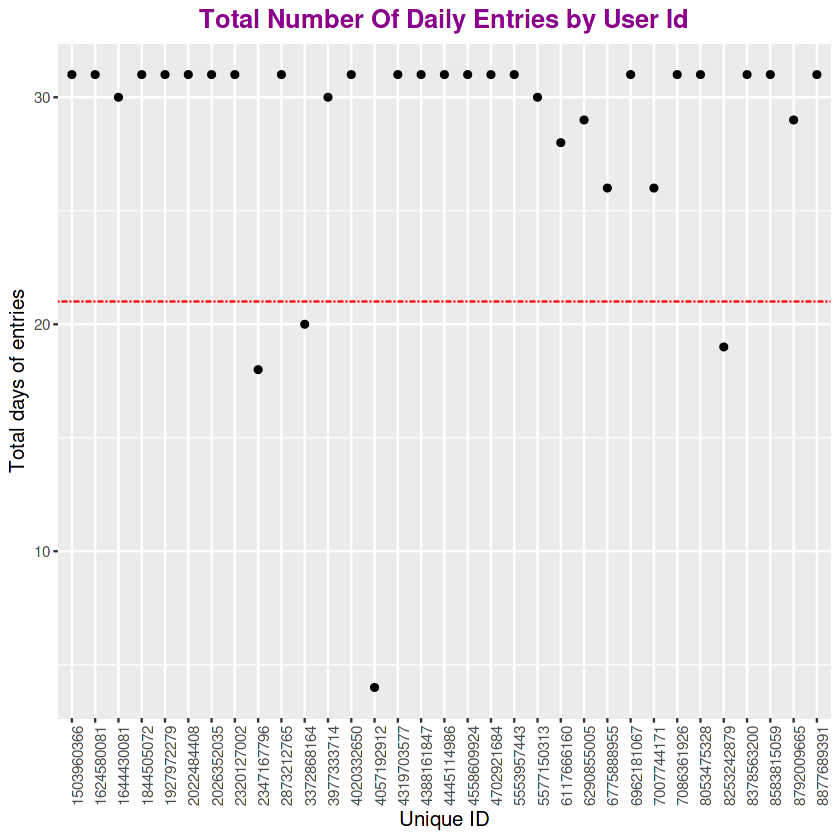

In [13]:
a<- count(activity1$id)
f <- data.frame(id=c(a$x),observation=c(a$freq))

ggplot(data = f, mapping = aes(x=factor(id),observation)) +
  geom_point() + 
  theme(axis.text.x = element_text(angle = 90)) +
  labs(title = "Total Number Of Daily Entries by User Id",  x="Unique ID", y="Total days of entries")+
  theme(plot.title = element_text(hjust = 0.5, face = "bold" ,size = 15 ,color = "magenta4"),axis.title = element_text(size = 12)) +
  geom_hline(yintercept = 21, linetype="twodash", color="red")

After reviewing the plot diagram for outliers, I decided to remove 4 participants that reported less than 3 weeks of data.

**Id: 2347167796, 3372868164, 4057192912, 8253242879**

**Removing Outliers**

  Removing outliers in activity, dailysleep and dailyweight data.

In [14]:
activity1 <- activity1[!grepl("2347167796", activity1$id), ]
activity1 <- activity1[!grepl("3372868164", activity1$id), ]
activity1 <- activity1[!grepl("4057192912", activity1$id), ]
activity1 <- activity1[!grepl("8253242879", activity1$id), ]
n_distinct(activity1$id)
nrow(activity1)

dailysleep1 <- dailysleep1[!grepl("2347167796", dailysleep1$id), ]
dailysleep1 <- dailysleep1[!grepl("3372868164", dailysleep1$id), ]
dailysleep1 <- dailysleep1[!grepl("4057192912", dailysleep1$id), ]
dailysleep1 <- dailysleep1[!grepl("8253242879", dailysleep1$id), ]
n_distinct(dailysleep1$id)
nrow(dailysleep1)

  
dailyweight1 <- dailyweight1[!grepl("2347167796", dailyweight1$id), ]
dailyweight1 <- dailyweight1[!grepl("3372868164", dailyweight1$id), ]
dailyweight1 <- dailyweight1[!grepl("4057192912", dailyweight1$id), ]
dailyweight1 <- dailyweight1[!grepl("8253242879", dailyweight1$id), ]
n_distinct(dailyweight1$id)
nrow(dailyweight1)

[1] 29

[1] 879

[1] 23

[1] 395

[1] 8

[1] 67

records after cleaning data:
* activity: 29 participant and 879 records
* dailysleep: 23 participant and 398 records
* dailyweight : 8 participant and 67 records

# Data Transformation
**Transforming activity data**

 Adding new column weekofday and TotalActiveMinutes


In [15]:
activity1$weekofday <- weekdays(activity1$activity_date)
activity1   <- activity1 %>% 
  mutate(TotalActiveMinutes = very_active_minutes + fairly_active_minutes + lightly_active_minutes)
head(activity1)

,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,weekofday,TotalActiveMinutes
,<dbl>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,Tuesday,366
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,Wednesday,257
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,Thursday,222
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,Friday,272
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,Saturday,267
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,Sunday,222


**Transforming dailysleep data**
* Separating SleepDay column into Date and Time
* Format Date column from character type to date type
* Adding new column for weekdays

In [16]:
dailysleep1 <- dailysleep1%>%
  separate(col = sleep_day, into = c('Date','Time'), sep = ' ')
dailysleep1$Date <- mdy(dailysleep1$Date)

dailysleep1$weekday <- strftime(dailysleep1$Date, "%A")
head(dailysleep1)

Warning message:
“Expected 2 pieces. Additional pieces discarded in 395 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


,id,Date,Time,total_sleep_records,total_minutes_asleep,total_time_in_bed,weekday
,<dbl>,<date>,<chr>,<int>,<int>,<int>,<chr>
1,1503960366,2016-04-12,12:00:00,1,327,346,Tuesday
2,1503960366,2016-04-13,12:00:00,2,384,407,Wednesday
3,1503960366,2016-04-15,12:00:00,1,412,442,Friday
4,1503960366,2016-04-16,12:00:00,2,340,367,Saturday
5,1503960366,2016-04-17,12:00:00,1,700,712,Sunday
6,1503960366,2016-04-19,12:00:00,1,304,320,Tuesday


**Transforming dailyweight data**
* Separating Date column into Date and Time
* Format Date column from character type to date type
* Adding new column for weekdays


In [17]:
dailyweight1 <- dailyweight1%>%
  separate(col = date, into = c('Date','Time'), sep = ' ')
dailyweight1$Date <- mdy(dailyweight1$Date)

dailyweight1$weekday <- strftime(dailyweight1$Date, "%A")
head(dailyweight1)

Warning message:
“Expected 2 pieces. Additional pieces discarded in 67 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


,id,Date,Time,weight_kg,weight_pounds,fat,bmi,is_manual_report,log_id,weekday
,<dbl>,<date>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<chr>
1,1503960366,2016-05-02,11:59:59,52.6,115.9631,22,22.65,True,1.462234e+12,Monday
2,1503960366,2016-05-03,11:59:59,52.6,115.9631,NA,22.65,True,1.462320e+12,Tuesday
3,1927972279,2016-04-13,1:08:52,133.5,294.3171,NA,47.54,False,1.460510e+12,Wednesday
4,2873212765,2016-04-21,11:59:59,56.7,125.0021,NA,21.45,True,1.461283e+12,Thursday
5,2873212765,2016-05-12,11:59:59,57.3,126.3249,NA,21.69,True,1.463098e+12,Thursday
6,4319703577,2016-04-17,11:59:59,72.4,159.6147,25,27.45,True,1.460938e+12,Sunday


**Transforming hourlydata**
*  combining all hourly data into one frame.

In [18]:
hourlydata <- merge(hourlycalories1, hourlyintensities1)
hourly_data_combined <- merge(hourlydata, hourlysteps1)
head(hourly_data_combined)

,id,activity_hour,calories,total_intensity,average_intensity,step_total
,<dbl>,<chr>,<int>,<int>,<dbl>,<int>
1,1503960366,4/12/2016 1:00:00 AM,61,8,0.133333,160
2,1503960366,4/12/2016 1:00:00 PM,66,6,0.100000,221
3,1503960366,4/12/2016 10:00:00 AM,99,29,0.483333,676
4,1503960366,4/12/2016 10:00:00 PM,65,9,0.150000,89
5,1503960366,4/12/2016 11:00:00 AM,76,12,0.200000,360
6,1503960366,4/12/2016 11:00:00 PM,81,21,0.350000,338


* Format ActivityHour column from character type to date time type.
* Separating ActivityHour column into Date and Time.

In [19]:
hourlysteps$ActivityHour <-  mdy_hms(hourlysteps$ActivityHour)
hourlysteps2 <- hourlysteps%>%
   separate(col = ActivityHour, into = c('Date','Time'), sep = ' ')
head(hourlysteps2)

,Id,Date,Time,StepTotal
,<dbl>,<chr>,<chr>,<int>
1,1503960366,2016-04-12,00:00:00,373
2,1503960366,2016-04-12,01:00:00,160
3,1503960366,2016-04-12,02:00:00,151
4,1503960366,2016-04-12,03:00:00,0
5,1503960366,2016-04-12,04:00:00,0
6,1503960366,2016-04-12,05:00:00,0


**Transforming minute data**

combining all minute data into one frame.

In [20]:
minutesdata<- merge(minutecalories1, minuteintensities1)
minutecombined <- merge(minutesdata, minutesteps1)
minute_data_combined <- merge(minutecombined, minutesmet1)
head(minute_data_combined)

,id,activity_minute,calories,intensity,steps,me_ts
,<dbl>,<chr>,<dbl>,<int>,<int>,<int>
1,1503960366,4/12/2016 1:00:00 AM,0.9438,0,0,12
2,1503960366,4/12/2016 1:00:00 PM,0.9438,0,0,12
3,1503960366,4/12/2016 1:01:00 AM,2.6741,1,36,34
4,1503960366,4/12/2016 1:01:00 PM,0.9438,0,0,12
5,1503960366,4/12/2016 1:02:00 AM,2.0449,1,9,26
6,1503960366,4/12/2016 1:02:00 PM,0.9438,0,0,12


# Data Analysis
**Record types vs number of records**

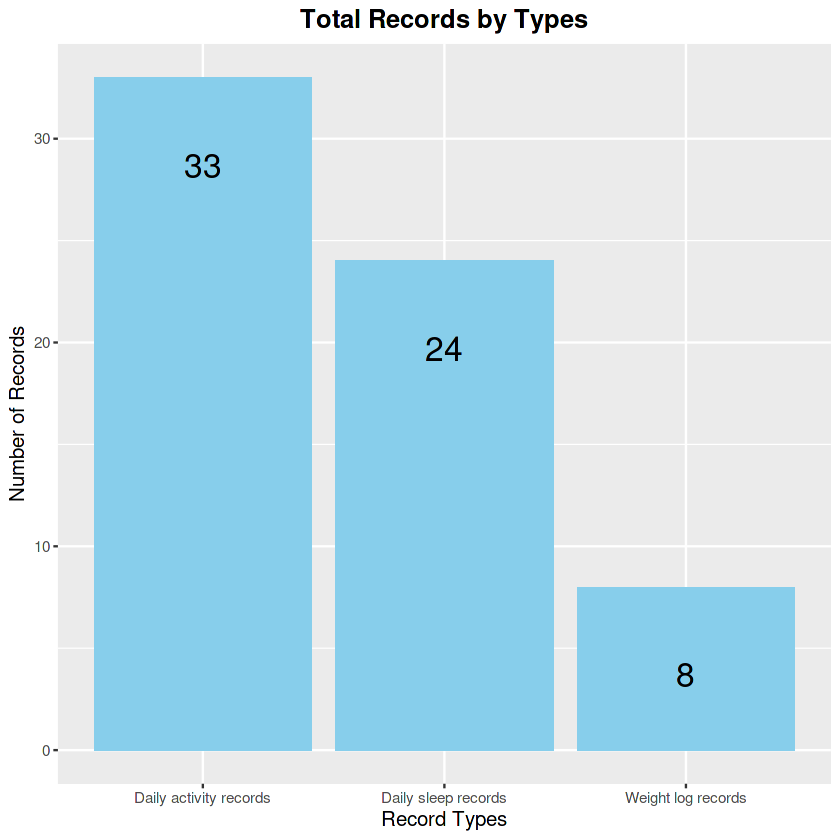

In [21]:
recored_type <- c("Daily activity records","Daily sleep records","Weight log records")
record_number <-c(n_distinct(daily_activity$Id),n_distinct(dailysleep$Id), n_distinct(dailyweight$Id))
record_count <- data.frame(recored_type,record_number)

ggplot(record_count, aes(recored_type,record_number)) +
  geom_bar(stat= "identity", fill="skyblue")+ 
  geom_text(aes(label=record_number), vjust=4, color="black",size = 7)+
  theme(plot.title = element_text(hjust = 0.5, face = "bold" ,size = 15 ,color = "black"),axis.title = element_text(size = 12))+
  labs(title="Total Records by Types",  x= "Record Types", y="Number of Records")


* 33 of the participants logged daily activity.
* 24 of the participants recorded sleep.
* 8 of the participants recorded their weight
* It is clear that participants record their daily activities more.
* only 73% of the participant recorded their sleep. This could be due to lack of comfort while sleeping, so taking them off before getting into sleep and so not recording their sleep.
* Design of the watch should be improved to make it comfortable to users and additional features like sleep mode reminder can help users track their sleep.   
* only 24% of the participant recorded their weight.
* Weigth tracking reminder can help increase users attention in tracking weights. 

**Weight Log Methods vs number of records**

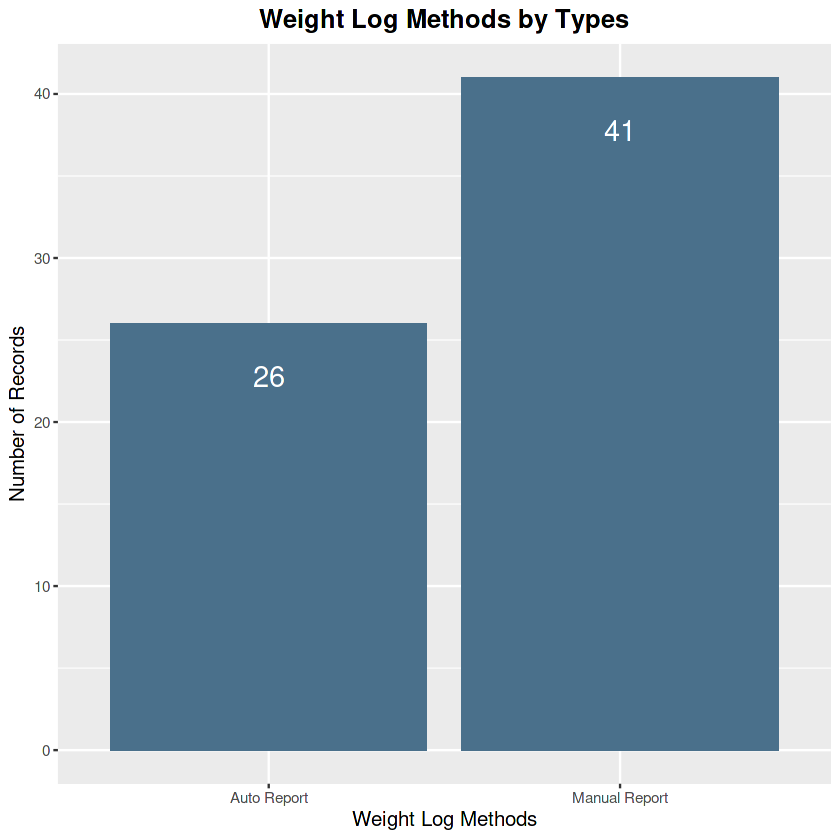

In [22]:
report_types <- c("Manual Report","Auto Report")
report_length <- c(length(which(dailyweight$IsManualReport =="True")),length(which(dailyweight$IsManualReport =="False")))
manualorauto <- data.frame(report_types,report_length)

ggplot(manualorauto, aes(report_types,report_length)) +
  geom_bar(stat= "identity", fill="skyblue4")+ 
  geom_text(aes(label=report_length), vjust=3, color="white", size=6)+
  theme(plot.title = element_text(hjust = 0.5, face = "bold" ,size = 15 ,color = "black"),axis.title = element_text(size = 12))+
  labs(title="Weight Log Methods by Types",  x= "Weight Log Methods", y="Number of Records")


* only 24% ,that is 8 out of 33 user recorder their weight.
* In that manual report entries are more than auto report entries.
* so improving features more in auto reporting and reminding to record their weights at specific intervals should be considered.

**Sedentary Minutes Distribution on daily basis**

 sedentary_minutes
 Min.   :   0     
 1st Qu.: 728     
 Median :1054     
 Mean   : 988     
 3rd Qu.:1224     
 Max.   :1440     

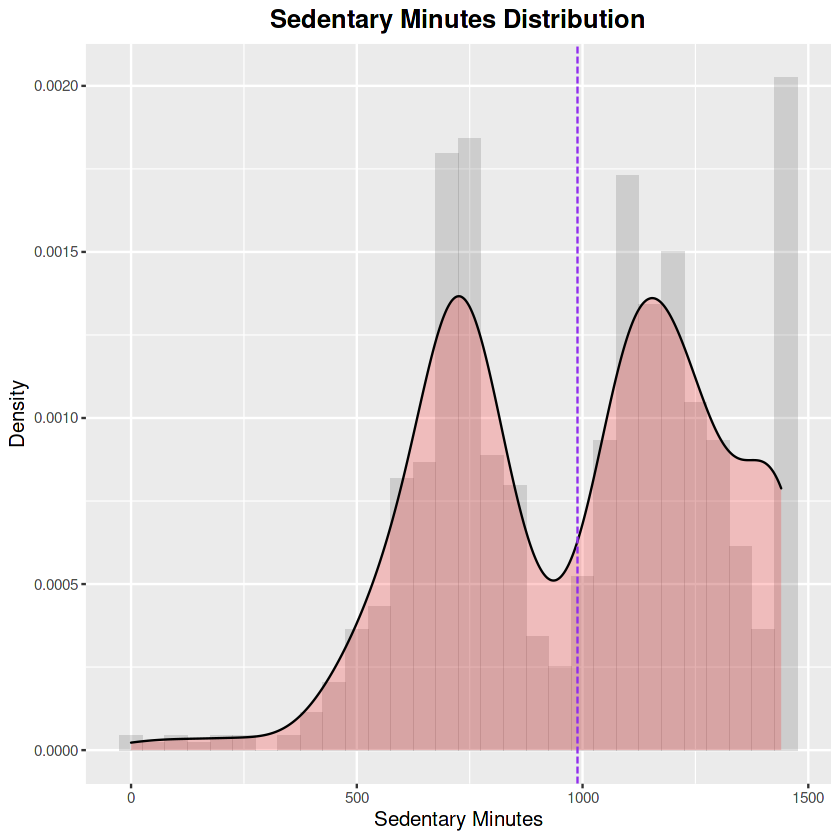

In [23]:
ggplot(activity1, aes(x=sedentary_minutes)) + 
  geom_histogram(aes(y=..density..), binwidth=50,alpha=0.2)+
  geom_density(alpha=0.2, fill="red") +
  theme(plot.title = element_text(hjust = 0.5, face = "bold" ,size = 15 ,color = "black"),axis.title = element_text(size = 12))+
  geom_vline(aes(xintercept=mean(sedentary_minutes, na.rm=T)), color="purple2", linetype="longdash")+
  labs(title="Sedentary Minutes Distribution", x= "Sedentary Minutes", y="Density")
activity1 %>% select(sedentary_minutes) %>% summary()


* The average sedentary minutes for all participants is 988 minutes or 16.5 hours.
* Sleeping comes under sedentary minutes, so an healthy adult and old people needs 7 to 9 hours of sleep per night.
* Therefore participant spends 7.5 hours on average in sedentary,which is huge.
* So features like reminding participant to be active or to take little steps at regular intervals should be considered.

**Average Sedentary Minutes by Day of the Week**

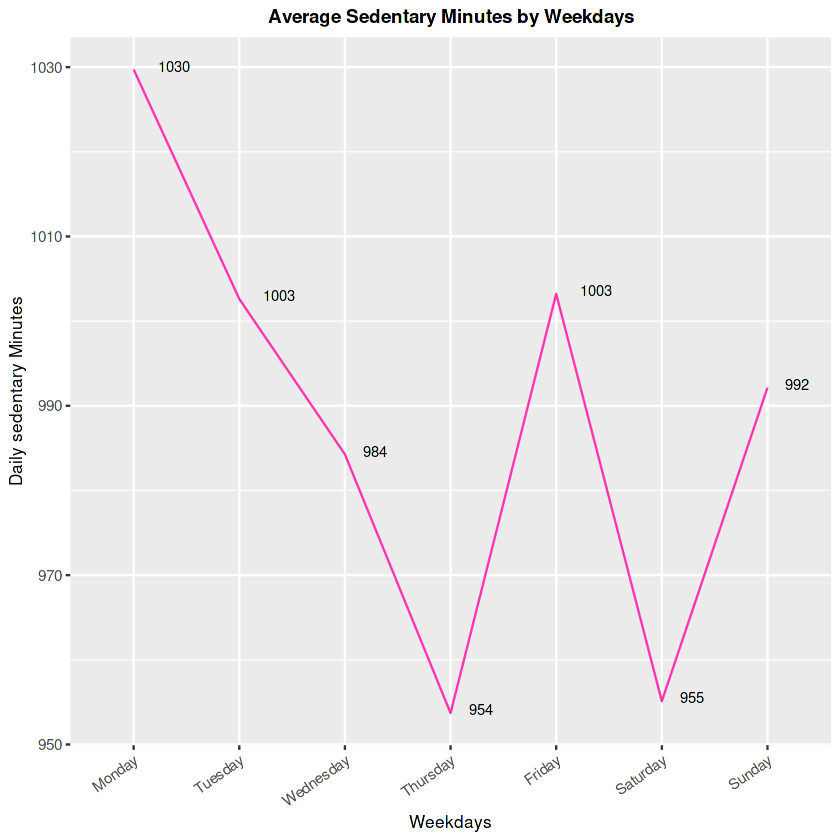

In [24]:
average_sedentary_minutes <- activity1 %>% 
      group_by(weekofday) %>% 
  summarise_at(vars(sedentary_minutes),
               list(sedentary_minutes = mean))
average_sedentary_minutes$weekofday <- ordered(average_sedentary_minutes$weekofday, levels=c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))

 ggplot(average_sedentary_minutes, aes(x= weekofday, y= sedentary_minutes, group=1))+
  geom_line(color = "maroon1")+
  labs(title="Average Sedentary Minutes by Weekdays", x= "Weekdays", y="Daily sedentary Minutes")+
  geom_text(aes(label=round(sedentary_minutes, digits=0), hjust=-0.75, vjust=0.2), size=3)+
  theme(plot.title = element_text(size=11,hjust = 0.5,face = "bold"), axis.title = element_text(size = 10), axis.text.x = element_text(angle = 35,hjust = 1))

This graph shows the average sedentary minutes by weekday shows highest values Users spent sedentary on Monday and lowest on Thursday.

**Active minutes by weekdays**

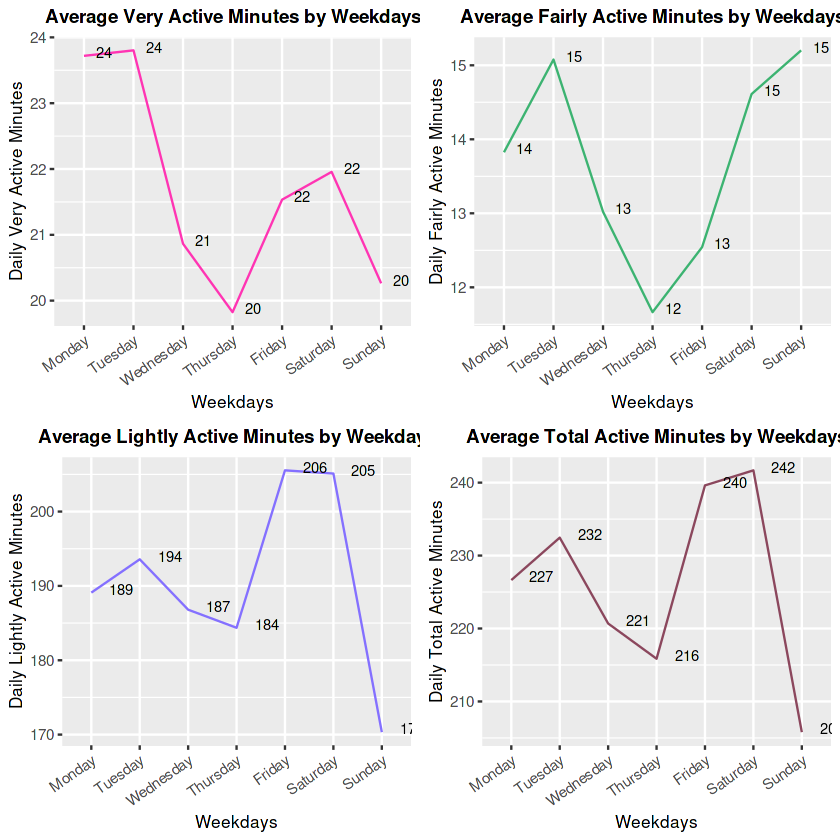

In [25]:
average_very_active_minutes <- activity1 %>% 
      group_by(weekofday) %>% 
  summarise_at(vars(very_active_minutes),
               list(very_active_minutes 
                    = mean))
average_very_active_minutes$weekofday <- ordered(average_very_active_minutes$weekofday, levels=c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))

very_active <- ggplot(average_very_active_minutes, aes(x= weekofday, y= very_active_minutes, group=1))+
  geom_line(color = "maroon1")+
  labs(title="Average Very Active Minutes by Weekdays", x= "Weekdays", y="Daily Very Active Minutes")+
  geom_text(aes(label=round(very_active_minutes, digits=0), hjust=-0.75, vjust=0.2), size=3)+
  theme(plot.title = element_text(size=11,hjust = 0.5,face = "bold"), axis.title = element_text(size = 10), axis.text.x = element_text(angle = 35,hjust = 1))


average_fairly_active_minutes <- activity1 %>% 
  group_by(weekofday) %>% 
  summarise_at(vars(fairly_active_minutes),
               list(fairly_active_minutes = mean))

average_fairly_active_minutes$weekofday <- ordered(average_fairly_active_minutes$weekofday, levels=c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))


fairly_active <- ggplot(average_fairly_active_minutes, aes(x= weekofday, y= fairly_active_minutes, group=1))+
  geom_line(color = "mediumseagreen")+
  labs(title="Average Fairly Active Minutes by Weekdays", x= "Weekdays", y="Daily Fairly Active Minutes")+
  geom_text(aes(label=round(fairly_active_minutes, digits=0), hjust=-0.75, vjust=0.2), size=3)+
  theme(plot.title = element_text(size=11,hjust = 0.5,face = "bold"), axis.title = element_text(size = 10),axis.text.x = element_text(angle = 35,hjust = 1))



average_lightly_active_minutes <- activity1 %>% 
  group_by(weekofday) %>% 
  summarise_at(vars(lightly_active_minutes),
               list(lightly_active_minutes = mean))
average_lightly_active_minutes$weekofday <- ordered(average_lightly_active_minutes$weekofday, levels=c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))


lightly_active <- ggplot(average_lightly_active_minutes, aes(x= weekofday, y= lightly_active_minutes, group=1))+
  geom_line(color = "lightslateblue")+
  labs(title="Average Lightly Active Minutes by Weekdays", x= "Weekdays", y="Daily Lightly Active Minutes")+
  geom_text(aes(label=round(lightly_active_minutes, digits=0), hjust=-0.75, vjust=0.2), size=3)+
  theme(plot.title = element_text(size=11,hjust = 0.5,face = "bold"), axis.title = element_text(size = 10),axis.text.x = element_text(angle = 35,hjust = 1))

average_total_active_minutes <- activity1 %>% 
  group_by(weekofday) %>% 
  summarise_at(vars(TotalActiveMinutes),
               list(TotalActiveMinutes = mean))

average_total_active_minutes$weekofday <- ordered(average_total_active_minutes$weekofday, levels=c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))

total_active <- ggplot(average_total_active_minutes, aes(x= weekofday, y= TotalActiveMinutes, group=1))+
  geom_line(color = "palevioletred4")+
  labs(title="Average Total Active Minutes by Weekdays", x= "Weekdays", y="Daily Total Active Minutes")+
  geom_text(aes(label=round(TotalActiveMinutes, digits=0), hjust=-0.75, vjust=0.2), size=3)+
  theme(plot.title = element_text(size=11,hjust = 0.5,face = "bold"), axis.title = element_text(size = 10),axis.text.x = element_text(angle = 35,hjust = 1))


grid.arrange(very_active,fairly_active,lightly_active,total_active, nrow=2)

* This graph shows that the participants are very active at the beginning of the week on average,Monday(24) and Tuesday(24).
* participants are fairly active on sunday(15) and tuesday(15) on average.
* participants are lightly active on friday(206) and sunday(205) on average.
* On average, participants are MOST active on Saturdays with 242 total active minutes and the LEAST active on Sundays with 208 total active minutes.
* sudden highest activity levels can be seen in Monday(sunday to monday) and Friday(thursday to friday).
* lowest activity levels are seen in thursday and sunday.
* so participants start off the week active(weekday) and slow down mid-week and again picking up on friday and saturday(weekend).


**Relationship between daily active minutes and calories burned**

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



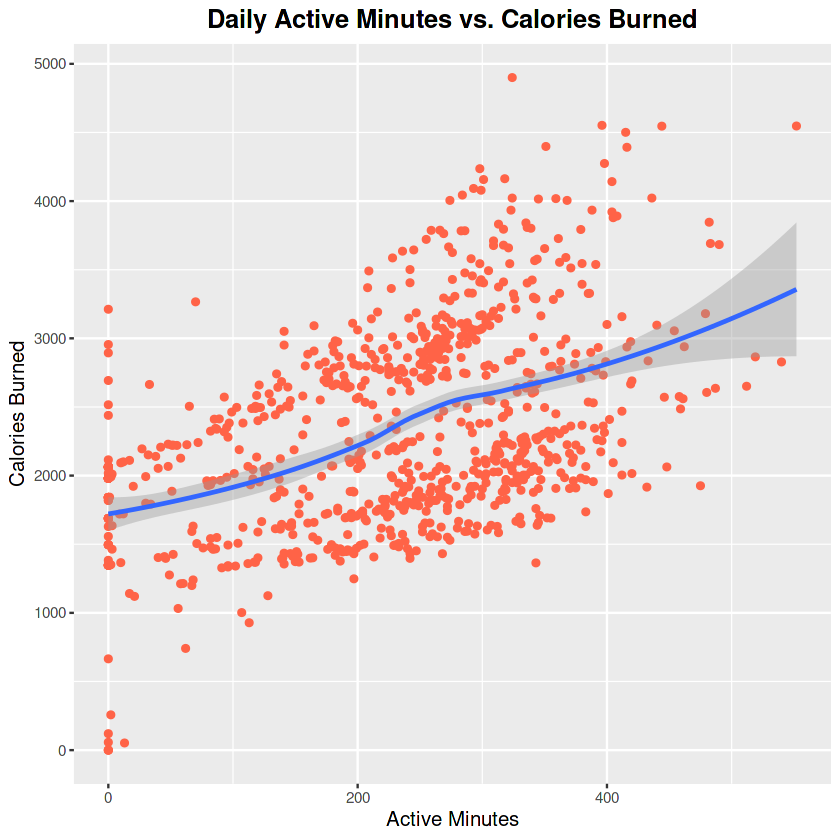

In [26]:
ggplot(activity1, aes(x = TotalActiveMinutes, y = calories))+
  geom_point(color="tomato")+
  geom_smooth()+
  labs(title="Daily Active Minutes vs. Calories Burned", x= "Active Minutes", y="Calories Burned")+
  theme(plot.title = element_text(size=15,hjust = 0.5,face = "bold"), axis.title =  element_text(size=12))

* The plot chart shows that there is a positive correlation between total active minutes and calories burned. 
* The more active minutes participants logged their total calories burned is increased.

**Relationship between daily active distance and calories burned**

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



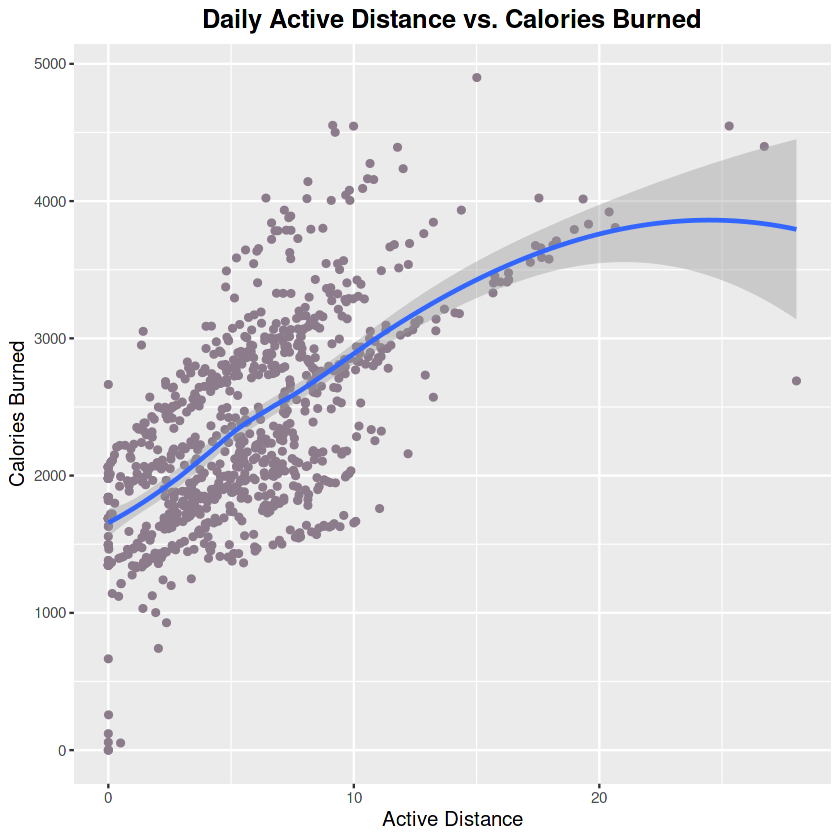

In [27]:
ggplot(activity1, aes(x = total_distance , y = calories))+
  geom_point(color="thistle4")+
  geom_smooth()+
  labs(title="Daily Active Distance vs. Calories Burned", x= "Active Distance", y="Calories Burned")+
  theme(plot.title = element_text(size=15,hjust = 0.5,face = "bold"), axis.title =  element_text(size=12))

* The plot chart shows that there is a positive correlation between total active distance and calories burned. 
* The more active distance participants logged their total calories burned is increased.

**Relationship between daily steps and calories burned**

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



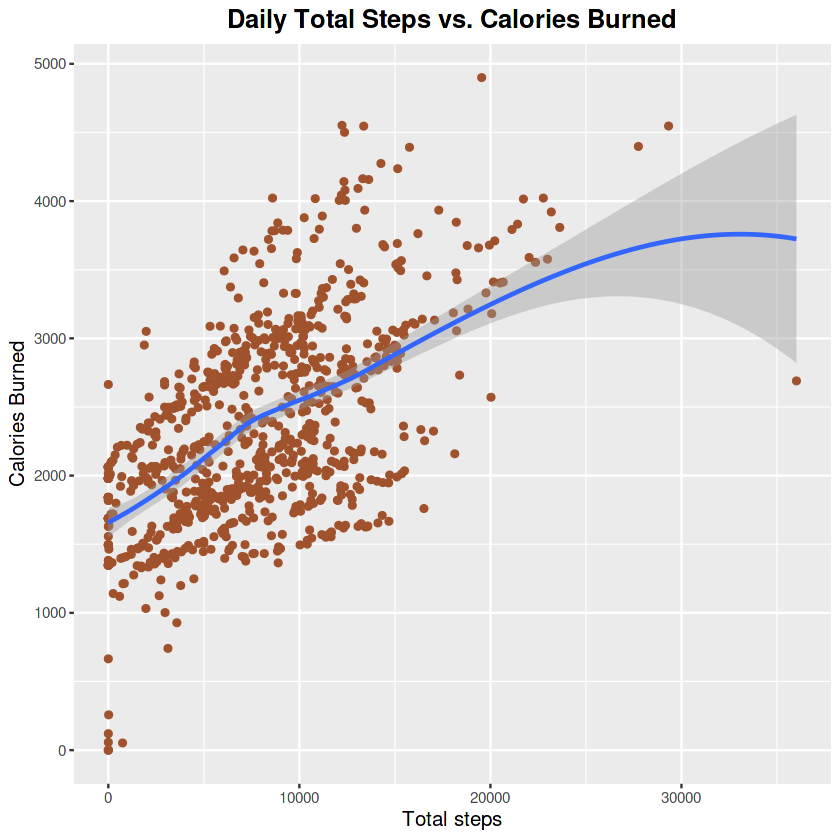

In [28]:
ggplot(activity1, aes(x = total_steps , y = calories))+
  geom_point(color="sienna")+
  geom_smooth()+
  labs(title="Daily Total Steps vs. Calories Burned", x= "Total steps", y="Calories Burned")+
  theme(plot.title = element_text(size=15,hjust = 0.5,face = "bold"), axis.title =  element_text(size=12))

* The plot chart shows that there is a positive correlation between total steps and calories burned. 
* The more steps participants logged their total calories burned is increased.

**Total minutes asleep distribution**

 total_minutes_asleep
 Min.   : 58.0       
 1st Qu.:358.0       
 Median :430.0       
 Mean   :418.1       
 3rd Qu.:492.0       
 Max.   :796.0       

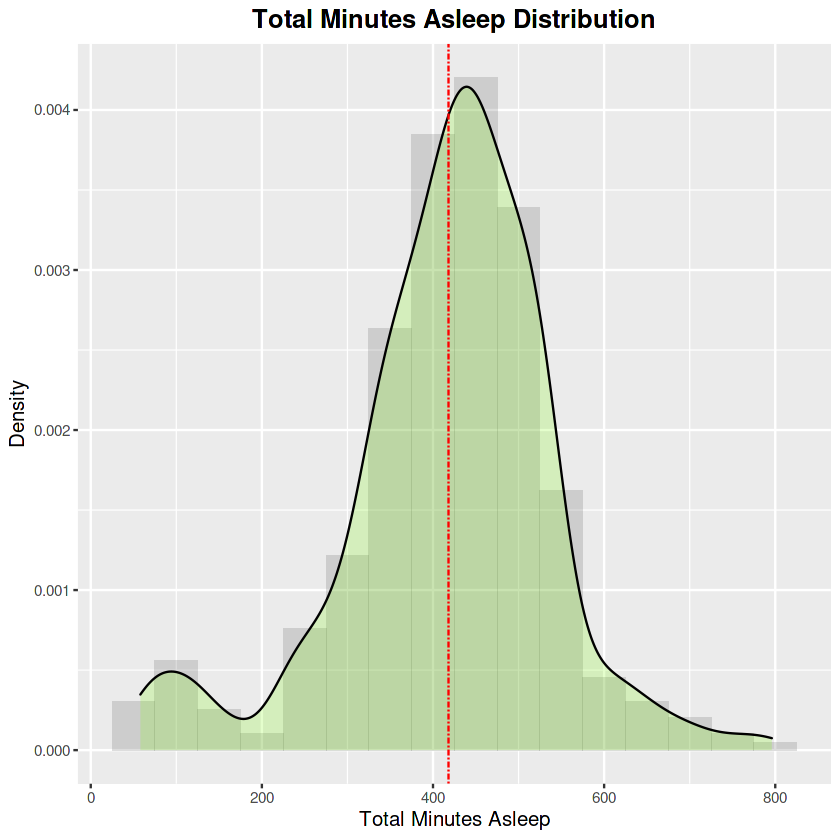

In [29]:
ggplot(dailysleep1, aes(x=total_minutes_asleep)) + 
  geom_histogram(aes(y=..density..), binwidth=50,alpha=0.2)+
  geom_density(alpha=0.2, fill="lawngreen") +
  geom_vline(aes(xintercept=mean(total_minutes_asleep, na.rm=T)), color="red", linetype="twodash")+
  theme(plot.title = element_text(hjust = 0.5, face = "bold" ,size = 15 ,color = "black"),axis.title = element_text(size = 12))+
  labs(title="Total Minutes Asleep Distribution", x= "Total Minutes Asleep", y="Density")
dailysleep1 %>% select(total_minutes_asleep) %>% summary()

* The data shows that the sleep time is normally distributed among all participants.
* The average sleep time is 418 minutes or 7 hours per day.
* According to CDC , adults or older people should have sleep of 7 to 9 hours per day.
* So all participants have adequate sleep.


**Sleep Data Total Minutes in Bed Versus Total Minutes Asleep**

Warning message:
“Ignoring unknown aesthetics: na.rm”
`geom_smooth()` using formula 'y ~ x'



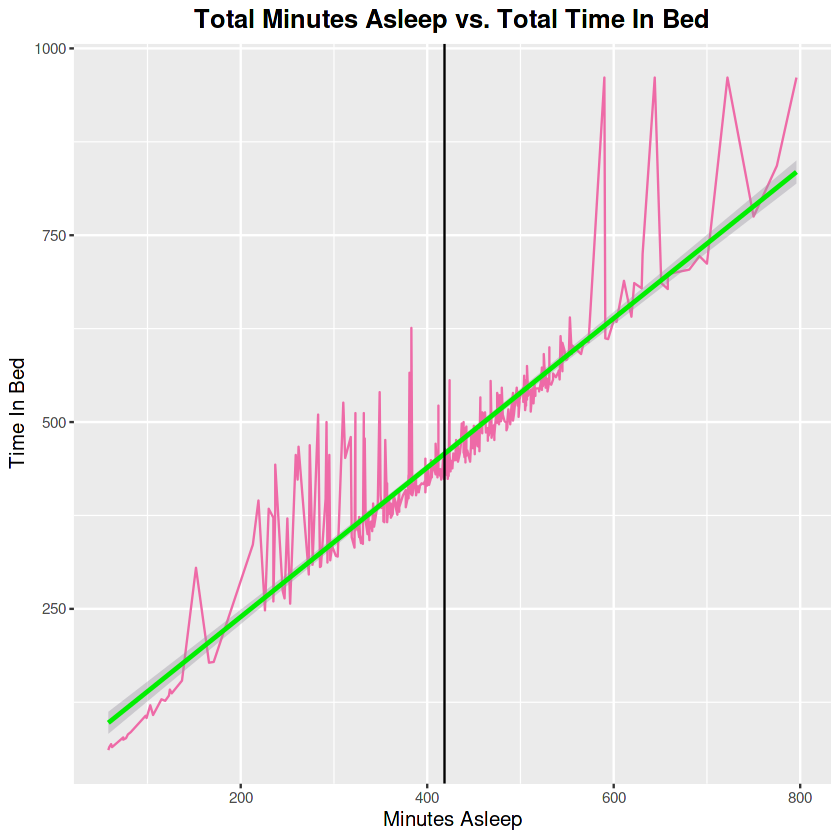

In [30]:
ggplot(dailysleep1, aes(x = total_minutes_asleep , y = total_time_in_bed))+
  geom_line(color="hotpink2")+
  geom_smooth(method=lm,color="green2",fill="#9C96A2",se=TRUE)+
  labs(title="Total Minutes Asleep vs. Total Time In Bed", x= "Minutes Asleep", y="Time In Bed")+
  geom_vline(aes(xintercept=mean(total_minutes_asleep), na.rm = T)) +
  theme(plot.title = element_text(size=15,hjust = 0.5,face = "bold"), axis.title =  element_text(size=12))


In [31]:
summary(dailysleep1)
mean(dailysleep1$total_minutes_asleep/60)
max(dailysleep1$total_time_in_bed/60)
max(dailysleep1$total_minutes_asleep/60)

       id                 Date                Time          
 Min.   :1.504e+09   Min.   :2016-04-12   Length:395        
 1st Qu.:4.020e+09   1st Qu.:2016-04-19   Class :character  
 Median :4.703e+09   Median :2016-04-27   Mode  :character  
 Mean   :5.096e+09   Mean   :2016-04-26                     
 3rd Qu.:6.962e+09   3rd Qu.:2016-05-04                     
 Max.   :8.792e+09   Max.   :2016-05-12                     
 total_sleep_records total_minutes_asleep total_time_in_bed   weekday         
 Min.   :1.000       Min.   : 58.0        Min.   : 61.0     Length:395        
 1st Qu.:1.000       1st Qu.:358.0        1st Qu.:402.0     Class :character  
 Median :1.000       Median :430.0        Median :461.0     Mode  :character  
 Mean   :1.124       Mean   :418.1        Mean   :457.2                       
 3rd Qu.:1.000       3rd Qu.:492.0        3rd Qu.:526.5                       
 Max.   :3.000       Max.   :796.0        Max.   :961.0                       

[1] 6.968734

[1] 16.01667

[1] 13.26667

* There is a linear relationship between the amount of time spent in bed vs the amount of sleep taken.
* On average,participant spend 418 minutes or 7 hours of time in sleeping.
* Participant spends maximum of 16 hours in bed while they spends only 13 hours in sleeping.
* So participants spends extra or sedentary time in bed apart from sleeping and so smart device should remind this to the users.

**Hourly total Steps  by Time of Day**

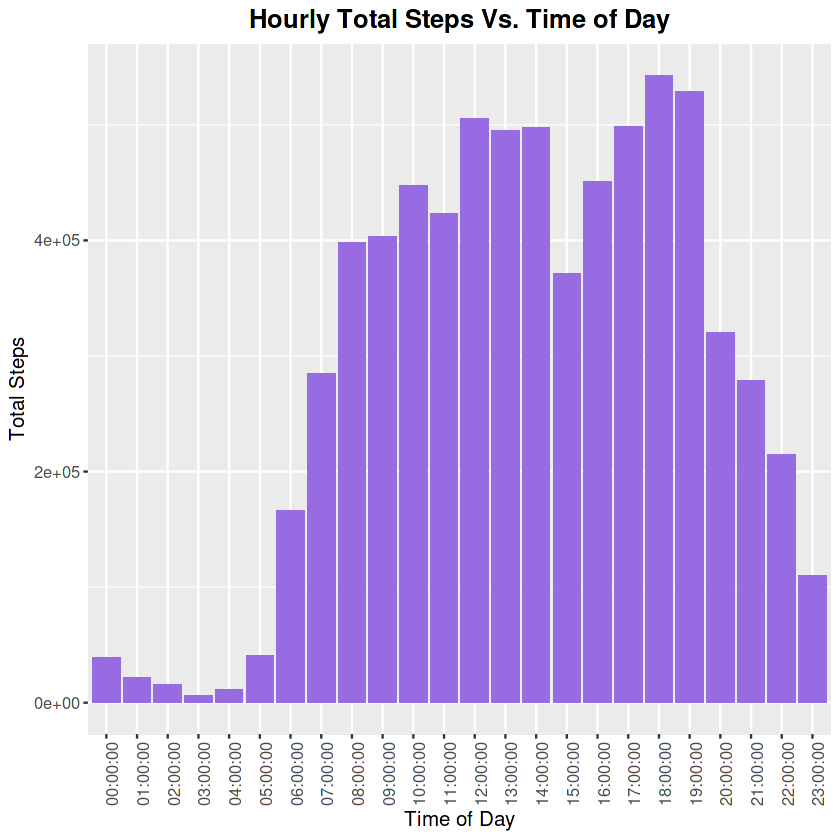

In [32]:
ggplot(hourlysteps2, aes(x=Time,y=StepTotal, group=24)) +
  geom_col(fill="#976BE2") +
  labs(title="Hourly Total Steps Vs. Time of Day",  x= "Time of Day", y="Total Steps") +
   theme(plot.title = element_text(size=15,hjust = 0.5,face = "bold"), 
        text = element_text(size=12), 
        axis.text.x = element_text(angle=90, hjust=1))

* This plot shows that Users are more active from 11:00am to 2:00pm, and then again from 4:00pm to 7:00pm.
* Users are most active is between 6:00pm to 7:00pm.
* The graph also shows sharp decreases in User activity at 2:00pm to 3:00pm and at 7:00pm to 8:00pm.

**Total Step Count by Day of the Week** 

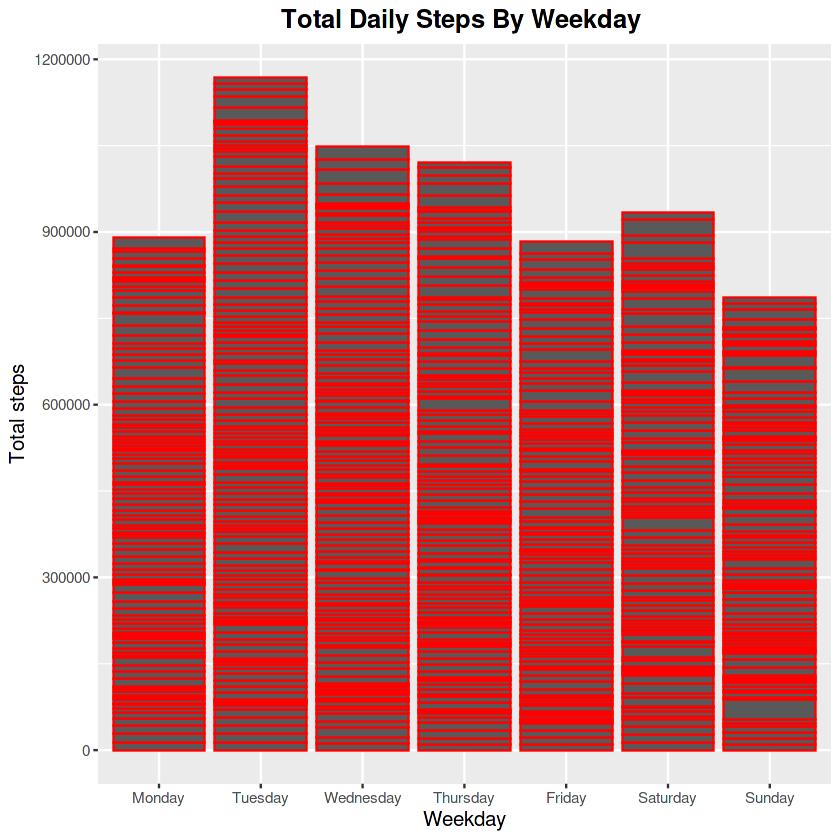

In [33]:
activity2 <- activity1 %>% group_by(total_steps,weekofday)
activity2$weekofday <- ordered(activity2$weekofday, levels=c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))
ggplot(activity2,aes(weekofday,total_steps))+
  geom_col(color="red")+
  labs(title = "Total Daily Steps By Weekday ",x= "Weekday",y="Total steps")+
  theme(plot.title = element_text(size = 15,hjust = 0.5,face="bold"),axis.title = element_text(size = 12))


* Daily Activity data results show Tuesday has the most total steps per day while Sunday has the least total steps per day.


**Correlation plots for the hourly_data_combined dataframe:**

,calories,total_intensity,average_intensity,step_total
calories,1.0,0.9,0.9,0.8
total_intensity,0.9,1.0,1.0,0.9
average_intensity,0.9,1.0,1.0,0.9
step_total,0.8,0.9,0.9,1.0


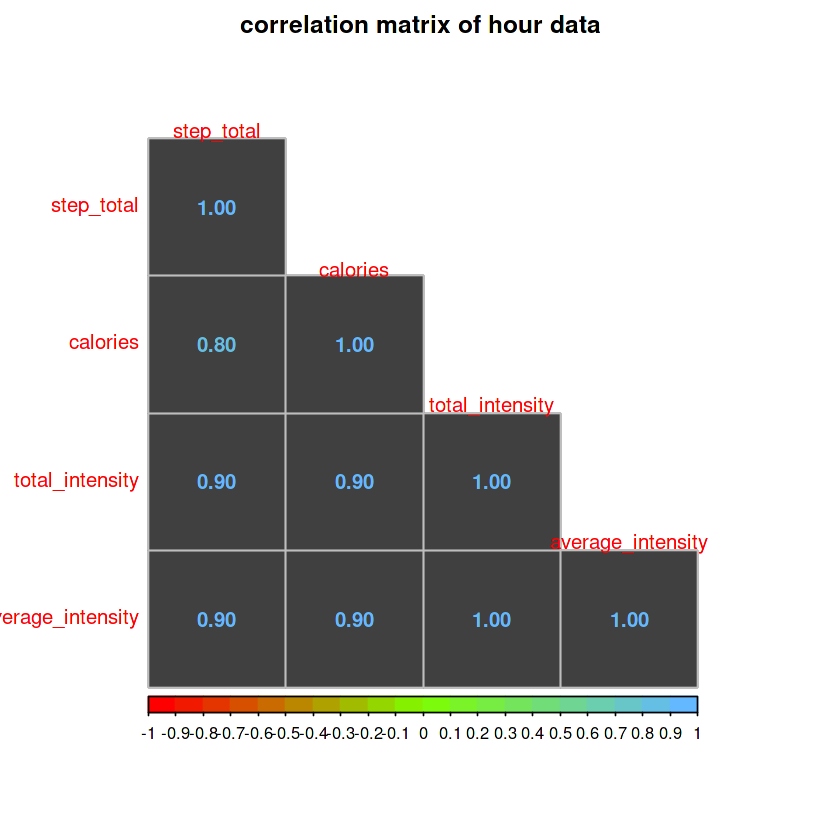

In [34]:
hourcorr <- hourly_data_combined %>% select(c(3:6))
hourplot <- round(cor(hourcorr),1)
head(hourplot)

corrplot(hourplot,method = "number",type = "lower",order = "hclust",col = colorRampPalette(c("red","chartreuse","steelblue1"))(20),addCoef.col = "black",bg = "grey25",title = "correlation matrix of hour data",mar = c(0,0,2,0),tl.srt=0) 

* This graph uses the pearson correlation values where 1 is strong positive correlation, 0 is no correlation and -1 is strong negative correlation.
* This graph shows that all hourly data have a positive correlation between them where total intensity and average intensity have a strong positive correlation

**Correlation plots for the minute_data_combined dataframe:**

,calories,intensity,steps,me_ts
calories,1.0,0.9,0.8,1.0
intensity,0.9,1.0,0.8,0.9
steps,0.8,0.8,1.0,0.9
me_ts,1.0,0.9,0.9,1.0


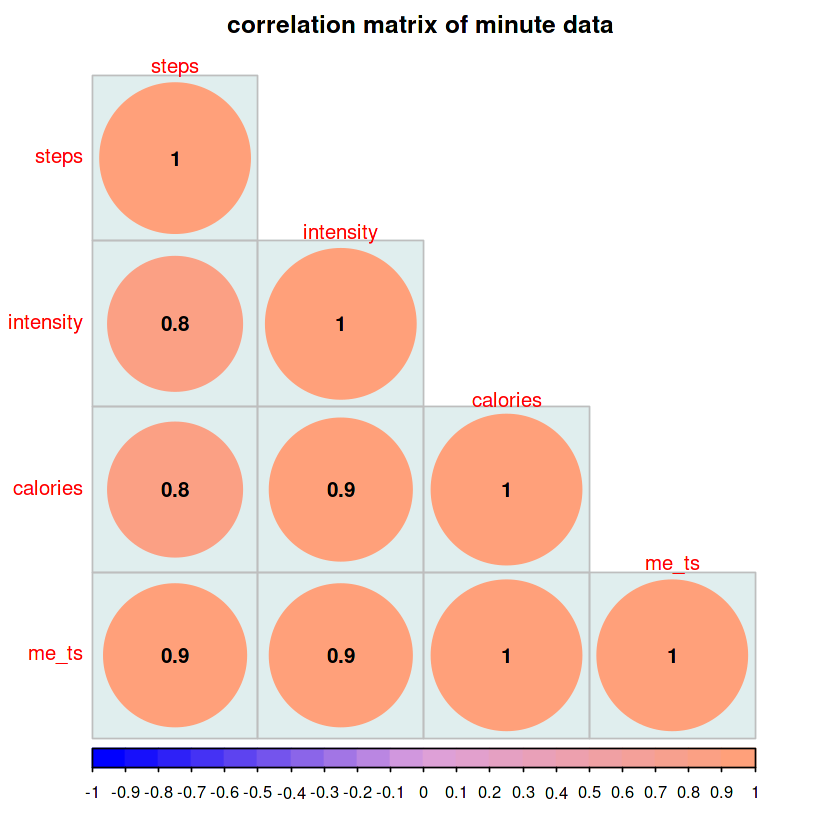

In [35]:
mincorr <- minute_data_combined %>% 
  select(c(3:6)) 

minutecorr <- round(cor(mincorr), 1)
head(minutecorr)

corrplot(minutecorr,method = "circle",type = "lower",order = "hclust",col = colorRampPalette(c("blue","plum","lightsalmon"))(20),addCoef.col = "black",bg = "azure2",title = "correlation matrix of minute data",mar = c(0,0,2,0),tl.srt=0)


* This graph shows that there is a positive correlation between them.
* There exist a strong positive correlation between calories and met(metabolic eqivalent of task).

**Summary of the analysis**

* Participants used their fitness trackers for daily activity the most.
* only 73% of the participant recorded their sleep. This could be due to lack of comfort while sleeping, so taking them off before getting into sleep and not recording their sleep.
* only 24% of the participant recorded their weight.In that manual report entries are more than auto report entries.
* participant spends 7.5 hours on average in sedentary where highest value Users spent sedentary is on Monday and lowest on Thursday.
* According to CDC, participants have adequate sleep of 7hours per day on average. 
* participants spends sedentary time in bed apart from sleeping. so more sedentary minutes leads to less calories burned.
* On average, participants are MOST active on Saturdays with 242 total active minutes and the LEAST active on Sundays with 208 total active minutes.Highest activity levels increase can be seen in Monday(sunday to monday) and Friday(thursday to friday), lowest activity levels decrease are seen in thursday and sunday.
* so participants start off the week active(weekday) after enjoying weekends and slow down mid-week which may be due to work and again picking up on friday and saturday ,may be waiting for their weekend plans.
* positive correlation between total active minutes, total distance, total steps and calories burned. Hence more the amount of active minutes, distance and steps leads to more calorie burned.
* sharp decreases in User activity at 2:00pm to 3:00pm and at 7:00pm to 8:00pm on each day.
* Daily Activity data results show Tuesday has the most total steps per day while Sunday has the least total steps per day.
* hourly calories,hourly intensities and hourly steps have a positive correlation among them.
* positive correlation among minute calories,minute intensities, minute steps and minute mets.

**Recommendations based on analysis:**

  On the basis of the analysis, insights are applied to Bellabeat Leaf product and the following recommendations are listed for marketing strategy to improve in areas of:
  1. sleep:
* Design of the watch should be improved to make it comfortable to users to wore during sleep and additional features like sleep mode reminder can help users turn on their sleep mode.
* Alarms for regular sleeptime which should automatically turn on sleep mode and track sleep hours which makes sure it does not affect next day's work with excess or less sleeping.
  2. weight:
* Tracking weight is an important part of activity tracking. Only 24% people tracked their weight. Improving features more in auto reporting and reminding to record their weights at specific intervals should be considered.
  3. promoting regular exercise: 
* Features like reminding participant to do a regular exercise in the morning or evening and suggesting variety of  exercises which shows amount of calories burned with time.
* Suggesting simple exercise or steps for few seconds or minutes can help people who dont have time for regular exercise.
   